Import necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

# Load the breast cancer dataset
cancer = datasets.load_breast_cancer()
print(f"Features: {cancer.feature_names}")
print("")
print(f"Target: {cancer.target_names}")

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target: ['malignant' 'benign']


Create a DataFrame from the dataset

In [2]:
# Create a DataFrame from the dataset
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# Map target values to labels for better readability
df["target"] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Scaling

In [3]:


# Scale the features using StandardScaler
columns_to_scale = cancer.feature_names
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

Split the data

In [4]:

# Split the data into training and testing sets
X = df.drop(columns=["target"])
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")

Train: (455, 30)
Test: (114, 30)


Hyperparameter Tuning

RandomizedSearchCV vs. GridSearchCV:

**RandomizedSearchCV**: RandomizedSearchCV performs a randomized search over a specified parameter space. It randomly selects combinations of hyperparameters from the defined parameter distributions. This is useful when the search space is large, and you want to explore a representative subset of possible hyperparameter combinations. It is more efficient than GridSearchCV in terms of time and computational resources, especially for high-dimensional hyperparameter spaces.

**GridSearchCV**: GridSearchCV exhaustively searches all possible combinations of hyperparameters from a predefined grid. It evaluates each combination using cross-validation. While it guarantees finding the best combination, it can be computationally expensive, especially for large search spaces.

Efficiency: RandomizedSearchCV is generally more efficient than GridSearchCV when the hyperparameter search space is large or when you have limited computational resources. It allows you to explore a wide range of hyperparameters without testing every possible combination.

Randomness: RandomizedSearchCV introduces randomness by randomly selecting hyperparameter combinations. As a result, it may not guarantee finding the absolute best combination, but it can discover good combinations efficiently.

N_iter Parameter: In RandomizedSearchCV, you specify the number of random combinations to try using the n_iter parameter, which controls the trade-off between exploration and exploitation of the hyperparameter space. You can adjust it based on your available resources and desired search depth.

In [5]:



# Record the starting time for measuring processing time
t0 = time.time()

# Define a hyperparameter grid for RandomizedSearchCV
parameters = {
    'hidden_layer_sizes': [(20,), (20, 10,), (10, 10,), (5, 5, 5,)],
    'activation': ['tanh', 'relu', 'logistic'],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.01, 0.001],
    'solver': ['sgd', 'adam'],
    'max_iter': [50, 100, 200]
}

# Create an MLPClassifier with default parameters
estimator = MLPClassifier(random_state=42,
                          n_iter_no_change=100,
                          early_stopping=True)

# Perform Randomized Search for hyperparameter tuning
clf = RandomizedSearchCV(estimator=estimator,
                         param_distributions=parameters,
                         n_iter=50,
                         cv=10,
                         n_jobs=-1,
                         verbose=True)
clf.fit(X, y)

# Record the ending time for processing time calculation
t1 = time.time()
print(f"Processing time: {t1-t0:.5f}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Processing time: 108.81237


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
# Print the best hyperparameters and the corresponding best score
print(clf.best_params_)

{'solver': 'adam', 'max_iter': 50, 'learning_rate_init': 0.01, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (5, 5, 5), 'activation': 'logistic'}


In [7]:

print(clf.best_score_)

0.9788847117794486


In [8]:





# Create a model using the best hyperparameters and fit it to the training data
model = clf.best_estimator_
model.fit(X_train, y_train)

# Calculate and print the training and testing accuracy
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")




Training Accuracy: 0.98
Testing Accuracy: 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


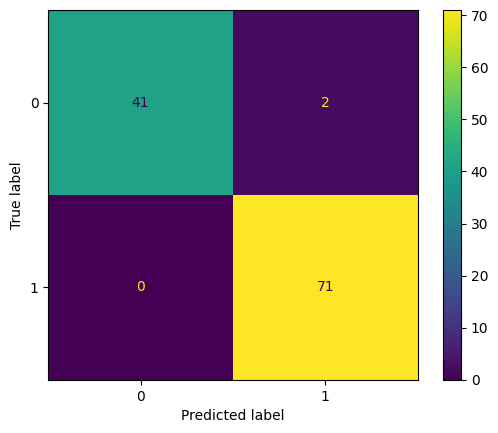

In [9]:
# Make predictions on the test data and plot the confusion matrix
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()